## Context

When you think of sneakers for a trip, the importance of good footwear cannot be discarded, and the obvious brands that come to mind are Adidas and Nike. Adidas vs Nike is a constant debate as the two giants in the apparel market, with a large market cap and market share, battle it out to come on top. As a newly hired Data Scientist in a market research company, you have been given the task of extracting insights from the data of men's and women's shoes, and grouping products together to identify similarities and differences between the product range of these renowned brands.



## Objective

To perform clustering on the products based on various factors


## Data Description

The dataset consists of 3268 products from Nike and Adidas with features of information including their ratings, discount, sales price, listed price, product name, and the number of reviews.

- Product Name: Name of the product
- Product ID: ID of the product
- Listing Price: Listed price of the product
- Sale Price: Sale price of the product
- Discount: Percentage of discount on the product
- Brand: Brand of the product
- Rating: Rating of the product
- Reviews: Number of reviews for the product

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to perform Agglomerative clustering and generate a dendogram 
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
data = pd.read_csv("data_add_nik.csv")

In [3]:
data.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3268 non-null   object 
 1   Product ID     3268 non-null   object 
 2   Listing Price  3268 non-null   int64  
 3   Sale Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Rating         3268 non-null   float64
 7   Reviews        3268 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 204.4+ KB


In [5]:
data.nunique()

Product Name     1531
Product ID       3179
Listing Price      78
Sale Price        227
Discount            6
Brand               5
Rating             32
Reviews           102
dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Listing Price,3268.0,6868.020196,4724.659386,0.0,4299.0,5999.0,8999.0,29999.0
Sale Price,3268.0,6134.265606,4293.247581,449.0,2999.0,4799.0,7995.0,36500.0
Discount,3268.0,26.875765,22.633487,0.0,0.0,40.0,50.0,60.0
Rating,3268.0,3.242105,1.428856,0.0,2.6,3.5,4.4,5.0
Reviews,3268.0,40.551714,31.543491,0.0,10.0,37.0,68.0,223.0


- Sales price seem to be right skewed as the Max, is quite large as compared to the mean which signifies the presence of the higher end products. 
- Discount seem to be left skewed and signifies variety of discounts are provided on variety of products from no discount to max of 60% discount. 
- Rating also seem to be left skewed and with average rating of 3.5 and maximum of 5. 
- Minimum of Listing Price is 0 which is not possible and we have to replace that. 

#### Let's check the rows where listing price is 0.

In [7]:
data[(data['Listing Price'] == 0)]

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
2625,Nike Air Force 1 '07 Essential,CJ1646-600,0,7495,0,Nike,0.0,0
2626,Nike Air Force 1 '07,CT4328-101,0,7495,0,Nike,0.0,0
2627,Nike Air Force 1 Sage Low LX,CI3482-200,0,9995,0,Nike,0.0,0
2628,Nike Air Max Dia SE,CD0479-200,0,9995,0,Nike,0.0,0
2629,Nike Air Max Verona,CZ6156-101,0,9995,0,Nike,0.0,0
...,...,...,...,...,...,...,...,...
3257,Air Jordan 5 Retro,CD2722-001,0,15995,0,Nike,3.3,3
3258,Nike ZoomX Vaporfly NEXT%,AO4568-600,0,19995,0,Nike,4.7,45
3260,Nike Tiempo Legend 8 Academy TF,AT6100-606,0,6495,0,Nike,0.0,0
3262,Nike React Metcon AMP,CT9155-063,0,13995,0,Nike,3.0,1


- **If listing price is 0, the discount also seem to be 0.** Hence we can try replacing listing price of these rows with the sales price. 

In [8]:
#Exploring where the listing price is 0. 
data.loc[(data['Listing Price'] == 0), ["Listing Price"]] = data.loc[
    (data['Listing Price'] == 0), ["Sale Price"]
].values

# Question 1a: Plot a histogram for all the numeric features and interprete the plots.

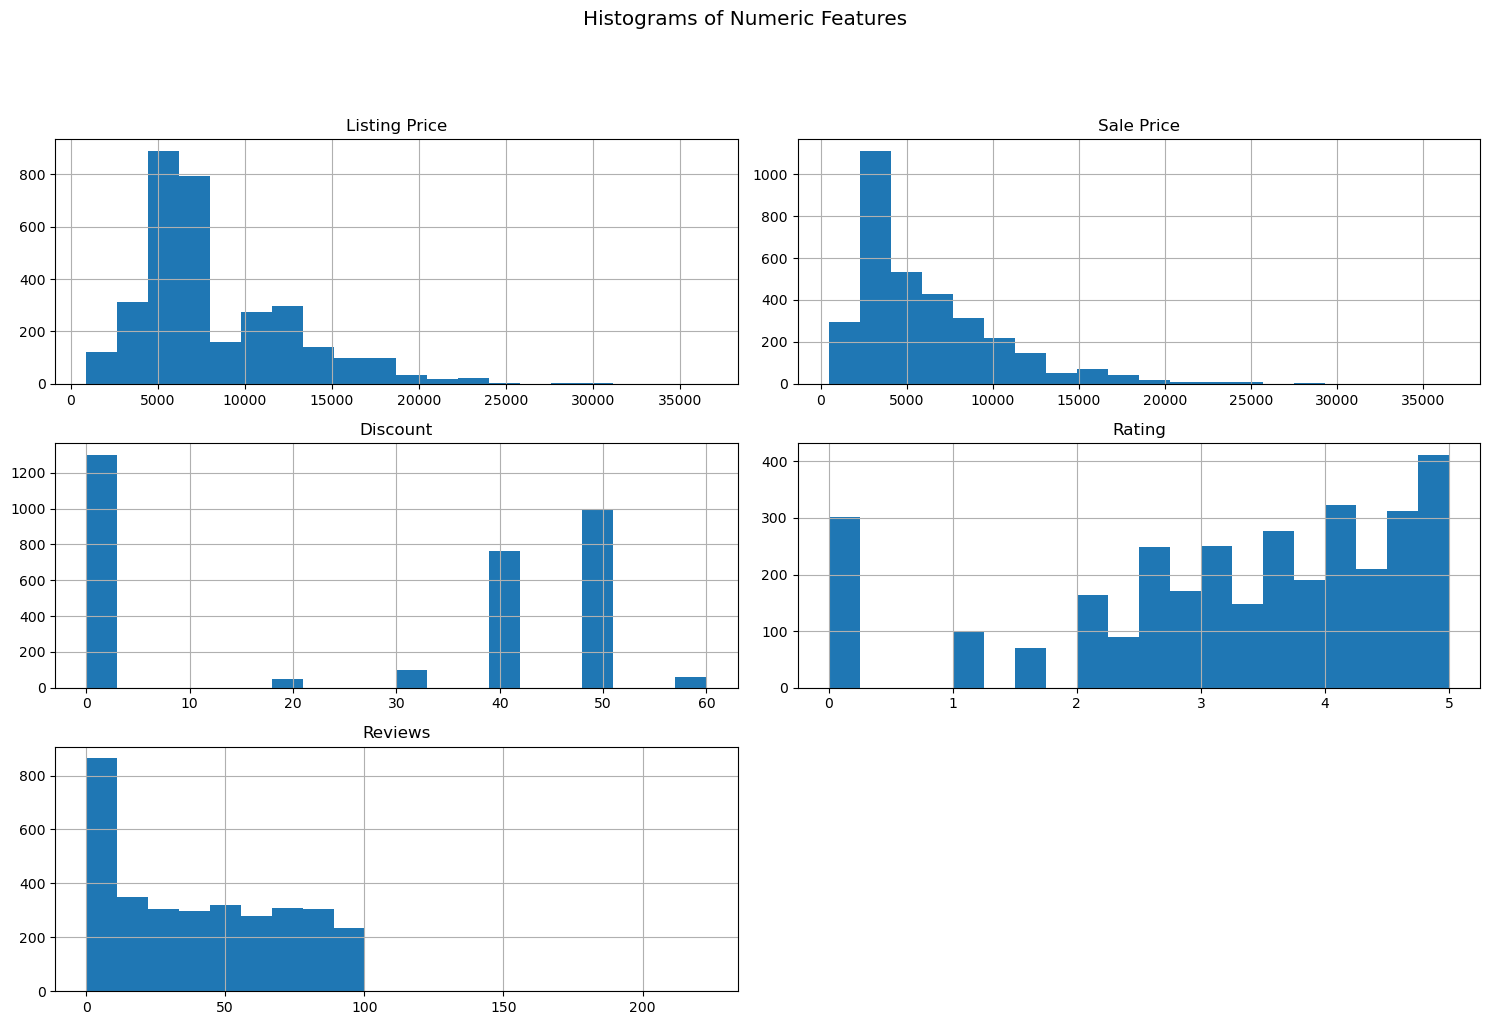

In [9]:
# Select numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numeric features
data[numeric_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numeric Features', x=0.5, y=1.02, ha='center', fontsize='x-large')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for title
plt.show()


Listing Price:
The distribution of Listing Price appears to be right-skewed, as the tail of the histogram extends to the right.
The maximum value is quite large, indicating the presence of higher-end products with higher listing prices.
The majority of products seem to have lower listing prices, with a few products having significantly higher prices.

Sale Price:
The distribution of Sale Price also seems right-skewed, with a long tail to the right.
The maximum sale price is much higher than the mean, suggesting the presence of high-value products.
The histogram indicates a variety of sale prices, with a concentration of products at lower price points.

Discount:
The histogram for Discount appears left-skewed, with a concentration of products having lower discounts.
The presence of a peak at the maximum discount (60%) suggests that some products have substantial discounts, while others have little to no discount. The distribution highlights the variety of discount percentages offered on different products.

Rating:
The histogram for Rating appears left-skewed, indicating a concentration of products with higher ratings.
The average rating is around 3.5, with the distribution skewed towards higher ratings.
Most products seem to have ratings above 3.

Reviews:
The distribution of Reviews appears right-skewed, with a concentration of products having a lower number of reviews.
The histogram indicates a range of review counts, with some products having a relatively high number of reviews.
There are fewer products with a large number of reviews, contributing to the right skewness.

In [10]:
# Find the maximum value in the "Discount" column
max_discount = data['Discount'].max()

# Print the maximum discount
print(f"The maximum discount is: {max_discount}%")


The maximum discount is: 60%


In [11]:
data.Brand.value_counts()

Brand
Adidas CORE / NEO           1111
Adidas ORIGINALS             907
Nike                         643
Adidas SPORT PERFORMANCE     606
Adidas Adidas ORIGINALS        1
Name: count, dtype: int64

- **There is a outlier Adidas Adidas ORIGINALS**, this can be replaced by Adidas ORIGINALS

In [12]:
data.Brand=data.Brand.replace({'Adidas Adidas ORIGINALS':'Adidas ORIGINALS'})

### Prepare data for Clustering

# Question 1b: Prepare data for Clustering

In [13]:
# Drop the column Product name, product id, brand and reviews. 
# Drop the specified columns
columns_to_drop = ['Product Name', 'Product ID', 'Brand', 'Reviews']
data_new = data.drop(columns=columns_to_drop)

# Define StandardScaler
scaler = StandardScaler()

# Fit and transform the data
data_scaled = pd.DataFrame(scaler.fit_transform(data_new), columns=data_new.columns)

data_scaled.head()


,Listing Price,Sale Price,Discount,Rating
0,1.509415,0.317928,1.021839,1.090476
1,-0.165605,-0.544022,1.021839,0.040524
2,-1.659542,-1.289493,0.579948,-0.449453
3,-0.301417,-0.613910,1.021839,0.600498
4,-0.075063,-0.497431,1.021839,0.180518


In [14]:
data_scaled_copy = data_scaled.copy(deep=True)

# Question 2: Fitting the K-Means Clustering and plotting Elbow plot

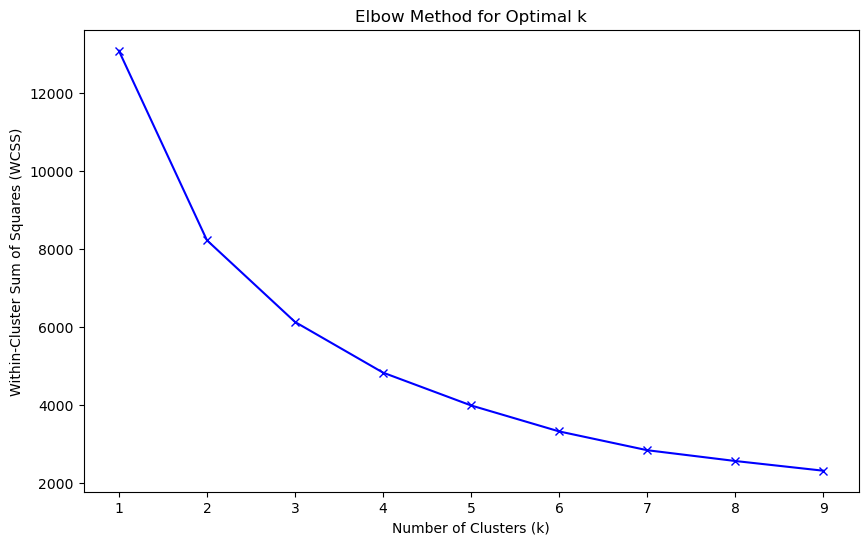

In [15]:
# Empty dictionary to store the SSE for each value of k
WCSS = {} 

# Iterate for a range of Ks and fit the scaled data to the algorithm. 
# Use inertia attribute from the clustering object and store the inertia value for that k 
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) 
    kmeans.fit(data_scaled)
    WCSS[k] = kmeans.inertia_

# Generate the Elbow plot
plt.figure(figsize=(10, 6))
plt.plot(list(WCSS.keys()), list(WCSS.values()), 'bx-')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.show()



The n_init parameter is a configuration in the KMeans algorithm that controls how many times the algorithm will be run with different initial centroids. It is part of the scikit-learn library in Python.

- It is hard to tell from this graph what will be the optimal value of K. Let's use silhouette score to visualize this

# Question 3: Checking the Silhouette Score and choosing optimal value for K

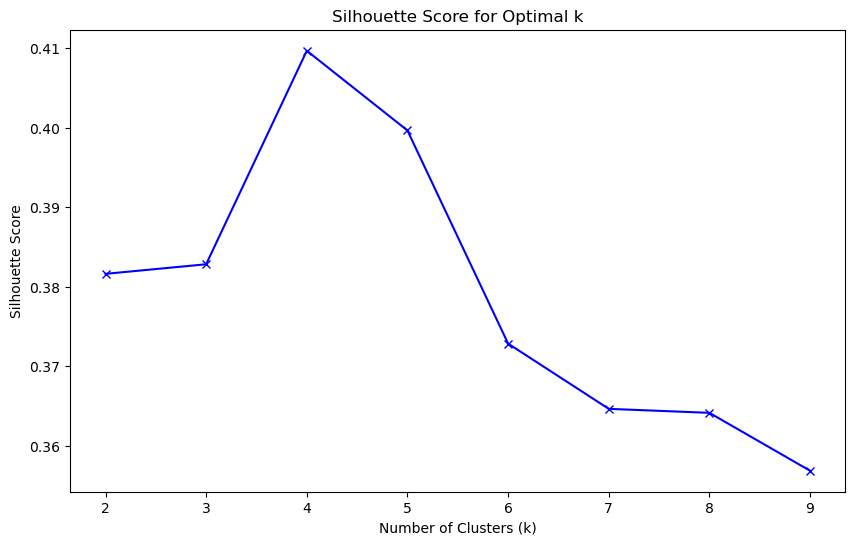

In [16]:
# Empty dictionary to store the Silhouette score for each value of k
sc = {} 

# Iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k 
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) 
    kmeans.fit(data_scaled)
    labels = kmeans.labels_
    sc[k] = silhouette_score(data_scaled, labels)

# Generate the Silhouette Score plot
plt.figure(figsize=(10, 6))
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal k")
plt.show()


In [17]:
# Initialize KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=4, random_state=1, n_init=10)

# Fit KMeans to the scaled data
kmeans.fit(data_scaled)

# Adding predicted labels to the original data and scaled data 
data_scaled_copy['KMeans_Labels'] = kmeans.predict(data_scaled)
data['KMeans_Labels'] = kmeans.predict(data_scaled)


Get the counts of elements in each cluster

In [18]:
data['KMeans_Labels'].value_counts()


KMeans_Labels
1    1797
3     746
0     402
2     323
Name: count, dtype: int64

### Question 4 and 5 : Cluster profiling

In [19]:
# Get numeric columns (excluding 'Product Name' and 'Brand')
numeric_columns = data.select_dtypes(include=['number']).columns

# Calculate mean and median of the original data for each label
mean = data.groupby('KMeans_Labels')[numeric_columns].mean()
median = data.groupby('KMeans_Labels')[numeric_columns].median()

# Concatenate mean and median vertically
df_kmeans = pd.concat([mean, median], axis=0)

# Set meaningful index names
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_3 Mean','group_0 Median', 'group_1 Median', 'group_2 Median', 'group_3 Median']

# Transpose the DataFrame for a clearer view
df_kmeans.T



,group_0 Mean,group_1 Mean,group_2 Mean,group_3 Mean,group_0 Median,group_1 Median,group_2 Median,group_3 Median
Listing Price,16553.141791,6813.468559,9511.123839,7043.171582,15995.0,5999.0,8495.0,7495.0
Sale Price,14377.800995,3696.501391,8246.876161,6649.530831,12999.0,3499.0,7995.0,6599.0
Discount,8.930348,45.414580,6.532508,0.697051,0.0,50.0,0.0,0.0
Rating,3.840796,3.389649,0.215480,3.874531,4.1,3.5,0.0,4.0
Reviews,30.805970,48.963272,15.588235,36.349866,20.0,49.0,0.0,28.0
KMeans_Labels,0.000000,1.000000,2.000000,3.000000,0.0,1.0,2.0,3.0


# Question 6: Provide a code to perform Agglomerative clustering and compare the result to that of KMeans. Also provide a code to generate the resulting dendogram.

      KMeans_Labels  Agglomerative_Labels
0                 1                     0
1                 1                     1
2                 1                     1
3                 1                     1
4                 1                     1
...             ...                   ...
3263              0                     0
3264              2                     1
3265              3                     1
3266              0                     0
3267              2                     1

[3268 rows x 2 columns]


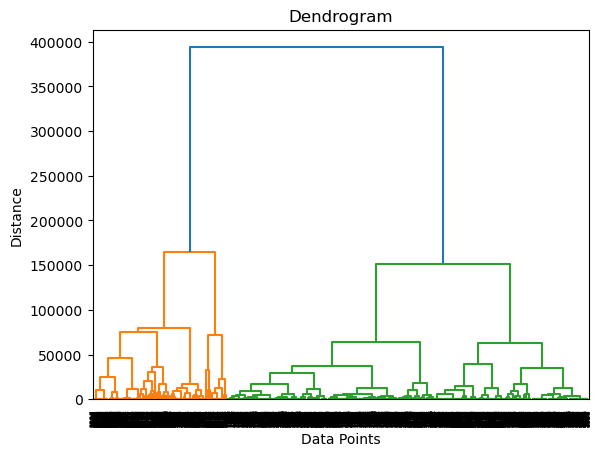

In [20]:
# Extract features for clustering (excluding non-numeric columns)
numeric_columns = data.select_dtypes(include=['number']).columns
features = data[numeric_columns]

# Perform Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=2)  
agglomerative_labels = agglomerative.fit_predict(features)

# Add Agglomerative clustering labels to the DataFrame
data['Agglomerative_Labels'] = agglomerative_labels

# Compare KMeans and Agglomerative clustering results
comparison_df = pd.DataFrame({
    'KMeans_Labels': data['KMeans_Labels'],
    'Agglomerative_Labels': data['Agglomerative_Labels']
})

# Display the comparison DataFrame
print(comparison_df)

# Generate a dendrogram
linked = linkage(features, method='ward')  
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


# Happy Learning!